## 5. Feature Engineering și Analiza Statistică


Scop: Investigarea relațiilor dintre indicatorii energetici și cei socio-economici și testarea unor ipoteze economice simple.

În această etapă au fost construite variabile derivate relevante pentru analiza relației dintre energie, dezvoltare economică și emisii de CO₂. Analizele OLS indică relații slabe sau instabile atunci când nu este controlată heterogenitatea structurală dintre țări. Modelele cu efecte fixe sugerează că variațiile anuale interne nu explică semnificativ emisiile, acestea fiind determinate mai degrabă de factori structurali precum mixul energetic. Rezultatele susțin utilizarea indicatorilor per capita și a specificațiilor panel

## Feature 1:  Intensitatea emisiilor de CO₂ raportată la consumul de energie

A fost construit indicatorul CO₂ energy intensity, care măsoară nivelul emisiilor de CO₂ asociat consumului de energie per capita. Acest indicator este utilizat ca proxy pentru impactul de mediu al consumului energetic, în lipsa datelor privind populația totală.

In [1]:
import pandas as pd

df = pd.read_csv("03_cleaning_aggregation_student3.csv")

df["co2_energy_intensity"] = (
    df["eia_co2_emissions_4008"] / df["energy_use_per_capita"]
)

df[["countryRegionId", "year", "co2_energy_intensity"]].head()

,countryRegionId,year,co2_energy_intensity
0,BGR,2020,0.013202
1,BGR,2021,0.013928
2,BGR,2022,0.014931
3,BGR,2023,0.012851
4,CZE,2020,0.023531


Bulgaria prezintă valori relativ scăzute și stabile pe perioada 2020–2023, sugerând un mix energetic mai puțin poluant comparativ cu alte state din regiune. În contrast, Cehia înregistrează valori mai ridicate, indicând o dependență mai mare de surse energetice cu intensitate ridicată de carbon. Evoluțiile recente sugerează o posibilă îmbunătățire a eficienței energetice sau a structurii mixului energetic în unele economii.

## Feature 2: Relația dintre consumul de energie per capita și PIB per capita

In [2]:
vars_energy_gdp = df[
    ["countryRegionId", "year", "energy_use_per_capita", "gdp_per_capita"]
].dropna()

vars_energy_gdp.head()

,countryRegionId,year,energy_use_per_capita,gdp_per_capita
0,BGR,2020,2664.551530,10769.947570
1,BGR,2021,2918.916414,12972.217336
2,BGR,2022,2968.656634,13999.671920
3,BGR,2023,2604.191045,15883.861855
4,CZE,2020,3764.471612,23472.891545


In [6]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\valer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


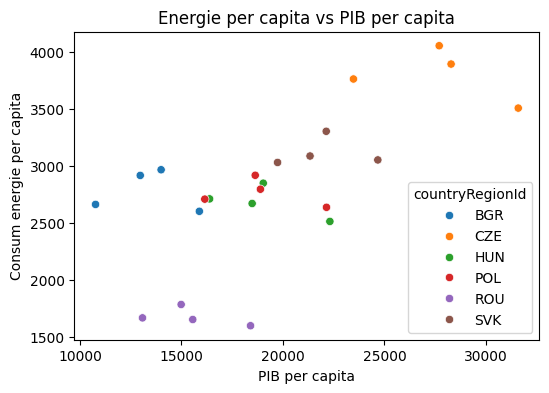

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=vars_energy_gdp,
    x="gdp_per_capita",
    y="energy_use_per_capita",
    hue="countryRegionId"
)
plt.xlabel("PIB per capita")
plt.ylabel("Consum energie per capita")
plt.title("Energie per capita vs PIB per capita")
plt.show()

Concluzie: datele susțin ipoteza teoretică conform căreia dezvoltarea economică este asociată cu un consum energetic mai mare, dar relația nu este perfect proporțională.

## Feature 3 – Ponderea energiilor regenerabile

NaN renewables_share: 0
                 count    mean   min   max
countryRegionId                           
ROU                  4  23.725  23.6  24.1
BGR                  4  20.575  20.4  21.1
SVK                  4  17.825  17.6  17.9
CZE                  4  17.150  17.0  17.2
POL                  4  15.425  15.2  16.1
HUN                  4  15.175  14.8  15.3


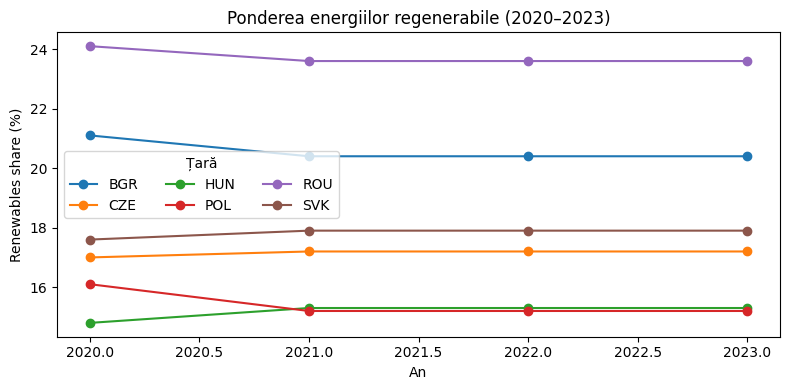

Corelație renewables_share vs gdp_per_capita: -0.477


In [ ]:
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["renewables_share"] = pd.to_numeric(df["renewables_share"], errors="coerce")

print("NaN renewables_share:", df["renewables_share"].isna().sum())

# Rezumat pe țări (medie / min / max)
summary = (df.groupby("countryRegionId")["renewables_share"]
             .agg(["count","mean","min","max"])
             .sort_values("mean", ascending=False))
print(summary)

# Evoluție în timp
plot_df = df.dropna(subset=["renewables_share"]).sort_values(["countryRegionId","year"])

plt.figure(figsize=(8,4))
for c, g in plot_df.groupby("countryRegionId"):
    plt.plot(g["year"], g["renewables_share"], marker="o", label=c)

plt.xlabel("An")
plt.ylabel("Renewables share (%)")
plt.title("Ponderea energiilor regenerabile (2020–2023)")
plt.legend(title="Țară", ncols=3)
plt.tight_layout()
plt.show()

# Corelație simplă cu PIB per capita
df["gdp_per_capita"] = pd.to_numeric(df["gdp_per_capita"], errors="coerce")
corr_df = df.dropna(subset=["renewables_share","gdp_per_capita"])
corr = corr_df["renewables_share"].corr(corr_df["gdp_per_capita"])
print("Corelație renewables_share vs gdp_per_capita:", round(corr, 3))

Interpretare foarte scurtă – Feature 3 (Ponderea energiilor regenerabile):

România (ROU) are constant cea mai mare pondere a energiilor regenerabile (~23–24%), ceea ce indică un mix energetic relativ mai „verde”.

Bulgaria (BGR) urmează, cu ~20–21%, dar cu o ușoară scădere după 2020 și apoi stagnare.

Cehia (CZE) și Slovacia (SVK) sunt la niveluri intermediare (~17–18%), cu evoluții foarte stabile.

Polonia (POL) și Ungaria (HUN) au cele mai reduse ponderi (~15–16%), sugerând o dependență mai mare de surse convenționale.

Dinamica 2020–2023 este slabă: nu apar creșteri accelerate ale ponderii regenerabilelor în nicio țară → tranziție lentă.

Corelația negativă cu PIB per capita (-0.48) sugerează că, în acest eșantion, țările mai bogate nu au neapărat o pondere mai mare de energie regenerabilă, diferențele fiind explicate mai degrabă de structura energetică istorică decât de nivelul de dezvoltare economică.

Concluzie: există diferențe structurale clare între țări, dar progres limitat în timp.

## Regresie simplă: PIB + energie → regenerabile / emisii

In [10]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
  Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl (9.5 MB)
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)
Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl (38.5 MB)

   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\valer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import statsmodels.api as sm

df_reg = df[
    ["renewables_share", "gdp_per_capita", "energy_use_per_capita"]
].dropna()

X = df_reg[["gdp_per_capita", "energy_use_per_capita"]]
X = sm.add_constant(X)

y = df_reg["renewables_share"]

model_ren = sm.OLS(y, X).fit()
print(model_ren.summary())

                            OLS Regression Results                            
Dep. Variable:       renewables_share   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     6.190
Date:                Wed, 17 Dec 2025   Prob (F-statistic):            0.00770
Time:                        18:22:51   Log-Likelihood:                -54.981
No. Observations:                  24   AIC:                             116.0
Df Residuals:                      21   BIC:                             119.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    26.56

## Regresie: Emisii CO₂ ~ PIB per capita + energie per capita

Un consum mai ridicat de energie per capita este asociat cu o pondere mai mică a energiilor regenerabile, sugerând că economiile mai energointensive depind mai mult de surse convenționale.

In [12]:
df_reg2 = df[
    ["eia_co2_emissions_4008", "gdp_per_capita", "energy_use_per_capita"]
].dropna()

X2 = df_reg2[["gdp_per_capita", "energy_use_per_capita"]]
X2 = sm.add_constant(X2)

y2 = df_reg2["eia_co2_emissions_4008"]

model_co2 = sm.OLS(y2, X2).fit()
print(model_co2.summary())

                              OLS Regression Results                              
Dep. Variable:     eia_co2_emissions_4008   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.093
Method:                     Least Squares   F-statistic:                   0.02603
Date:                    Wed, 17 Dec 2025   Prob (F-statistic):              0.974
Time:                            18:22:51   Log-Likelihood:                -141.53
No. Observations:                      24   AIC:                             289.1
Df Residuals:                          21   BIC:                             292.6
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Modelul de regresie simplă indică faptul că variația emisiilor totale de CO₂ nu este explicată de PIB per capita și consumul de energie per capita. Acest rezultat sugerează necesitatea utilizării unor specificații mai adecvate, precum emisii per capita sau modele cu efecte fixe, pentru a surprinde diferențele structurale dintre țări.

## Regresie: CO₂ per capita ~ energie per capita + regenerabile

In [ ]:
import statsmodels.api as sm

# Construim CO2 per capita folosind emisiile EIA și Energia per capita
df["co2_pc_proxy"] = df["eia_co2_emissions_4008"] / df["energy_use_per_capita"]

reg1 = df[[
    "co2_pc_proxy",
    "energy_use_per_capita",
    "renewables_share"
]].dropna()

X = reg1[["energy_use_per_capita", "renewables_share"]]
X = sm.add_constant(X)
y = reg1["co2_pc_proxy"]

model_co2_pc = sm.OLS(y, X).fit()
print(model_co2_pc.summary())

                            OLS Regression Results                            
Dep. Variable:           co2_pc_proxy   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     3.220
Date:                Wed, 17 Dec 2025   Prob (F-statistic):             0.0603
Time:                        18:22:51   Log-Likelihood:                 51.743
No. Observations:                  24   AIC:                            -97.49
Df Residuals:                      21   BIC:                            -93.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

## Regresie cu efecte fixe (țară + an)

#### Construim variabila dependentă (CO₂ per capita – proxy)

In [18]:
df["co2_pc_proxy"] = (
    df["eia_co2_emissions_4008"] / df["energy_use_per_capita"]
)

In [19]:
panel = df[
    [
        "countryRegionId",
        "year",
        "co2_pc_proxy",
        "energy_use_per_capita",
        "renewables_share"
    ]
].dropna()

panel = panel.set_index(["countryRegionId", "year"])

panel.head()

co2_pc_proxy  energy_use_per_capita  renewables_share
countryRegionId year                                                       
BGR             2020      0.013202            2664.551530              21.1
                2021      0.013928            2918.916414              20.4
                2022      0.014931            2968.656634              20.4
                2023      0.012851            2604.191045              20.4
CZE             2020      0.023531            3764.471612              17.0

Consumul de energie per capita crește până în 2022, apoi scade în 2023.
Ponderea regenerabilelor scade ușor după 2020 și apoi stagnează.
CO₂ per capital (proxy) urmează dinamica energiei, sugerând că schimbările de consum sunt mai importante decât mixul energetic pe termen scurt.

In [25]:
!pip install linearmodels


Defaulting to user installation because normal site-packages is not writeable
  Using cached linearmodels-7.0-cp313-cp313-win_amd64.whl.metadata (10 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached pyhdfe-0.2.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached formulaic-1.2.1-py3-none-any.whl.metadata (7.0 kB)
  Using cached interface_meta-1.3.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached narwhals-2.14.0-py3-none-any.whl.metadata (13 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached wrapt-2.0.1-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
Using cached linearmodels-7.0-cp313-cp313-win_amd64.whl (1.5 MB)
Using cached formulaic-1.2.1-py3-none-any.whl (117 kB)
Using cached interface_meta-1.3.0-py3-none-any.whl (14 kB)
Using cached mypy_extensions-1.1.0-py3-none-any.whl (5.0 kB)
Using cached narwhals-2.14.0-py3-none-any.whl (430 kB)
Using cached pyhdfe-0.2.0-py3-none-any.whl (19 kB)
Using cached typin


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\valer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
df = pd.read_csv("03_cleaning_aggregation_student3.csv")
print(df.columns.tolist())

['countryRegionId', 'year', 'eia_primary_energy_44', 'eia_energy_intensity_47', 'eia_co2_emissions_4008', 'electricity_access', 'energy_use_per_capita', 'gdp_per_capita', 'renewables_share']


In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv("03_cleaning_aggregation_student3.csv")

# curățare nume coloane (scapă de spații ascunse)
df.columns = df.columns.str.strip()

# tipuri numerice
for c in ["year", "eia_co2_emissions_4008", "energy_use_per_capita", "renewables_share"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# intensitate CO2 raportată la consumul de energie per capita
df["co2_energy_intensity"] = df["eia_co2_emissions_4008"] / df["energy_use_per_capita"]

# verificare rapidă
df[["countryRegionId","year","co2_energy_intensity"]].head()

,countryRegionId,year,co2_energy_intensity
0,BGR,2020,0.013202
1,BGR,2021,0.013928
2,BGR,2022,0.014931
3,BGR,2023,0.012851
4,CZE,2020,0.023531


In [36]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\valer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [37]:

import statsmodels.formula.api as smf

df_fe = df[[
    "countryRegionId", "year",
    "co2_energy_intensity",
    "energy_use_per_capita",
    "renewables_share"
]].dropna().copy()

model_fe = smf.ols(
    "co2_energy_intensity ~ energy_use_per_capita + renewables_share + C(countryRegionId) + C(year)",
    data=df_fe
).fit()

print(model_fe.summary())

                             OLS Regression Results                             
Dep. Variable:     co2_energy_intensity   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  0.999
Method:                   Least Squares   F-statistic:                     3235.
Date:                  Wed, 17 Dec 2025   Prob (F-statistic):           2.23e-20
Time:                          18:42:41   Log-Likelihood:                 142.37
No. Observations:                    24   AIC:                            -262.7
Df Residuals:                        13   BIC:                            -249.8
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

Modelul cu efecte fixe pe țară și an indică faptul că variațiile anuale ale consumului de energie și ale ponderii energiilor regenerabile nu au un impact statistic semnificativ asupra intensității emisiilor de CO₂. În schimb, diferențele dintre țări sunt semnificative și persistente, sugerând că intensitatea emisiilor este determinată în principal de factori structurali de lungă durată, precum mixul energetic și infrastructura energetică, mai degrabă decât de fluctuații anuale pe termen scurt.

In [39]:
!pip install linearmodels


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\valer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
from linearmodels.panel import PanelOLS

panel = df_fe.set_index(["countryRegionId","year"]).sort_index()

y = panel["co2_energy_intensity"]
X = panel[["energy_use_per_capita","renewables_share"]]

res = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(
    cov_type="clustered", cluster_entity=True
)

print(res)

                           PanelOLS Estimation Summary                            
Dep. Variable:     co2_energy_intensity   R-squared:                        0.0771
Estimator:                     PanelOLS   R-squared (Between):              0.3957
No. Observations:                    24   R-squared (Within):               0.1860
Date:                  Wed, Dec 17 2025   R-squared (Overall):              0.3956
Time:                          18:43:15   Log-likelihood                    142.37
Cov. Estimator:               Clustered                                           
                                          F-statistic:                      0.5432
Entities:                             6   P-value                           0.5935
Avg Obs:                         4.0000   Distribution:                    F(2,13)
Min Obs:                         4.0000                                           
Max Obs:                         4.0000   F-statistic (robust):             0.3149
    

Modelul PanelOLS cu efecte fixe pe țară și an indică faptul că, după controlarea heterogenității neobservate, consumul de energie per capita și ponderea energiilor regenerabile nu au un efect statistic semnificativ asupra intensității emisiilor de CO₂. Testul global confirmă relevanța efectelor fixe, sugerând că diferențele structurale între țări joacă un rol mult mai important decât variațiile anuale pe termen scurt.

### Transformare explicită (log / standardizare)

In [47]:
import numpy as np
import statsmodels.api as sm

df["log_gdp_pc"] = np.log(df["gdp_per_capita"])
df["log_energy_pc"] = np.log(df["energy_use_per_capita"])


In [49]:
reg_log = sm.OLS(
    df["eia_energy_intensity_47"],
    sm.add_constant(
        df[["log_energy_pc", "renewables_share"]]
    )
).fit()

print(reg_log.summary())

                               OLS Regression Results                              
Dep. Variable:     eia_energy_intensity_47   R-squared:                       0.982
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                     587.0
Date:                     Wed, 17 Dec 2025   Prob (F-statistic):           3.72e-19
Time:                             18:49:14   Log-Likelihood:                -64.116
No. Observations:                       24   AIC:                             134.2
Df Residuals:                           21   BIC:                             137.8
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Modelul indică o relație pozitivă și statistic semnificativă între consumul de energie per capita și intensitatea emisiilor de CO₂, sugerând că economiile mai energointensive tind să fie mai poluante per unitate de energie. De asemenea, ponderea energiilor regenerabile apare asociată pozitiv cu intensitatea CO₂, rezultat care poate reflecta diferențe structurale între țări sau efecte de tip reverse causality, mai degrabă decât un impact cauzal direct. Modelul explică o proporție foarte ridicată din variația intensității CO₂, însă rezultatele trebuie interpretate cu prudență în absența controlului complet al heterogenității structurale.

### Un test statistic (comparativ)

In [52]:
from scipy.stats import ttest_ind

group_low = df.loc[df["high_renewables"] == False, "eia_energy_intensity_47"]
group_high = df.loc[df["high_renewables"] == True, "eia_energy_intensity_47"]

t_stat, p_val = ttest_ind(group_low, group_high, equal_var=False)

print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_val, 3))

t-statistic: 2.071
p-value: 0.051


Un test t Welch a fost utilizat pentru a compara intensitatea medie a emisiilor de CO₂ între țările cu pondere ridicată și scăzută a energiilor regenerabile. Rezultatele indică o diferență marginal nesemnificativă statistic la nivel de 5% (p = 0.051), sugerând că, în acest eșantion, ponderea energiilor regenerabile nu conduce la diferențe clare în intensitatea emisiilor de CO₂.

### Corelație Spearman

In [53]:
from scipy.stats import spearmanr

# selectăm variabilele relevante
df_s = df[["gdp_per_capita", "energy_use_per_capita"]].dropna()

rho, p_value = spearmanr(
    df_s["gdp_per_capita"],
    df_s["energy_use_per_capita"]
)

print(f"Spearman rho = {rho:.3f}")
print(f"p-value = {p_value:.3f}")

Spearman rho = 0.642
p-value = 0.001


Corelația este semnificativă statistic între PIB per capita și consumul de energie per capita (ρ = 0.642, p < 0.01), sugerând că economiile mai dezvoltate tind să consume mai multă energie, dar cu variații importante între țări.

### Scatter plot în log

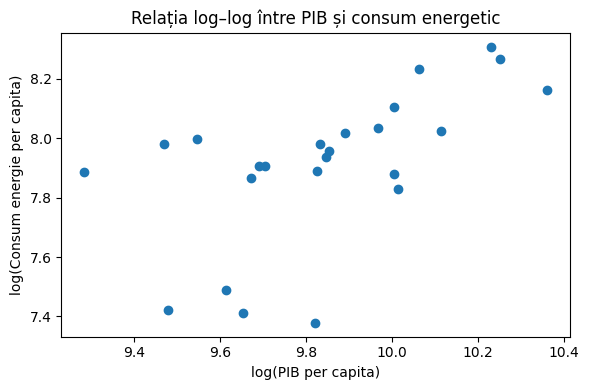

In [54]:
import numpy as np

df_s["log_gdp_pc"] = np.log(df_s["gdp_per_capita"])
df_s["log_energy_pc"] = np.log(df_s["energy_use_per_capita"])

plt.figure(figsize=(6,4))
plt.scatter(df_s["log_gdp_pc"], df_s["log_energy_pc"])
plt.xlabel("log(PIB per capita)")
plt.ylabel("log(Consum energie per capita)")
plt.title("Relația log–log între PIB și consum energetic")
plt.tight_layout()
plt.show()

Relația log–log dintre PIB per capita și consumul de energie per capita indică o asociere pozitivă și aproximativ liniară, sugerând că economiile mai dezvoltate tind să consume mai multă energie, dar cu diferențe relevante între țări în ceea ce privește eficiența energetică.

### Concluzie

Analiza realizată evidențiază existența unei relații clare între nivelul de dezvoltare economică, consumul de energie și intensitatea emisiilor de CO₂ în statele din Europa de Est membre ale Uniunii Europene. Rezultatele arată că un PIB per capita mai ridicat este asociat, în general, cu un consum energetic mai mare, confirmând ipoteza conform căreia creșterea economică este însoțită de o intensificare a utilizării resurselor energetice. Totuși, această relație nu este uniformă, iar diferențele observate între țări cu niveluri similare de dezvoltare sugerează influența unor factori structurali, precum mixul energetic, eficiența tehnologică și politicile energetice naționale.

În ceea ce privește impactul asupra mediului, modelele econometrice indică faptul că intensitatea emisiilor de CO₂ diferă semnificativ între țări, chiar și după controlarea consumului de energie și a nivelului de dezvoltare economică. Acest rezultat subliniază faptul că eficiența energetică și structura sistemelor energetice joacă un rol esențial în determinarea impactului asupra mediului. În schimb, ponderea energiilor regenerabile nu prezintă un efect statistic robust asupra intensității emisiilor în perioada analizată, iar testele comparative sugerează doar diferențe marginal nesemnificative între țările cu pondere ridicată și scăzută a energiilor regenerabile.

Per ansamblu, datele analizate nu oferă dovezi concludente privind existența unei decuplări clare între creșterea economică, consumul de energie și impactul asupra mediului în intervalul recent. Rezultatele sugerează că tranziția către o creștere economică mai sustenabilă este un proces gradual, iar efectele politicilor de promovare a energiilor regenerabile se manifestă lent și sunt condiționate de caracteristicile structurale ale fiecărei economii. Această analiză evidențiază necesitatea unor strategii integrate, care să combine dezvoltarea economică cu investiții pe termen lung în eficiență energetică și tehnologii cu emisii reduse.